In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from gapminder import gapminder
salary=pd.read_csv(r"/Users/angelaivonnesalgadobeltran/Documents/IronHack/Projects/Project_4_Data/base_etablissement_par_tranche_effectif.csv")

In [3]:
from gapminder import gapminder

In [4]:
pip install gapminder

Note: you may need to restart the kernel to use updated packages.


In [5]:
salary.head()

,CODGEO,LIBGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
0,01001,L'Abergement-Clémenciat,82,01,25,22,1,2,0,0,0,0,0,0
1,01002,L'Abergement-de-Varey,82,01,10,9,1,0,0,0,0,0,0,0
2,01004,Ambérieu-en-Bugey,82,01,996,577,272,63,46,24,9,3,2,0
3,01005,Ambérieux-en-Dombes,82,01,99,73,20,3,1,2,0,0,0,0
4,01006,Ambléon,82,01,4,4,0,0,0,0,0,0,0,0


In [6]:
salary.shape

(36681, 14)

In [7]:
# show null/NA values per column
salary.isnull().sum()

CODGEO      0
LIBGEO      0
REG         0
DEP         0
E14TST      0
E14TS0ND    0
E14TS1      0
E14TS6      0
E14TS10     0
E14TS20     0
E14TS50     0
E14TS100    0
E14TS200    0
E14TS500    0
dtype: int64

In [8]:
salary.dtypes

CODGEO      object
LIBGEO      object
REG          int64
DEP         object
E14TST       int64
E14TS0ND     int64
E14TS1       int64
E14TS6       int64
E14TS10      int64
E14TS20      int64
E14TS50      int64
E14TS100     int64
E14TS200     int64
E14TS500     int64
dtype: object

In [9]:
#finding duplicates rows
salary.duplicated().sum()

0

In [10]:
"""
CODGEO : geographique code for the town (can be joined with codeinsee column from "namegeographic_information.csv')
LIBGEO : name of the town (in french)
REG : region number
DEP : depatment number
E14TST : total number of firms in the town
E14TS0ND : number of unknown or null size firms in the town
E14TS1 : number of firms with 1 to 5 employees in the town
E14TS6 : number of firms with 6 to 9 employees in the town
E14TS10 : number of firms with 10 to 19 employees in the town
E14TS20 : number of firms with 20 to 49 employees in the town
E14TS50 : number of firms with 50 to 99 employees in the town
E14TS100 : number of firms with 100 to 199 employees in the town
E14TS200 : number of firms with 200 to 499 employees in the town
E14TS500 : number of firms with more than 500 employees in the town

"""

'\nCODGEO : geographique code for the town (can be joined with codeinsee column from "namegeographic_information.csv\')\nLIBGEO : name of the town (in french)\nREG : region number\nDEP : depatment number\nE14TST : total number of firms in the town\nE14TS0ND : number of unknown or null size firms in the town\nE14TS1 : number of firms with 1 to 5 employees in the town\nE14TS6 : number of firms with 6 to 9 employees in the town\nE14TS10 : number of firms with 10 to 19 employees in the town\nE14TS20 : number of firms with 20 to 49 employees in the town\nE14TS50 : number of firms with 50 to 99 employees in the town\nE14TS100 : number of firms with 100 to 199 employees in the town\nE14TS200 : number of firms with 200 to 499 employees in the town\nE14TS500 : number of firms with more than 500 employees in the town\n\n'

In [11]:
salary.rename(columns={'CODGEO':'codgeo'}, inplace=True)
salary.rename(columns={'LIBGEO':'name_town'}, inplace=True)
salary.rename(columns={'REG':'reg'}, inplace=True)
salary.rename(columns={'DEP':'dep'}, inplace=True)
salary.rename(columns={'E14TST':'total_firms'}, inplace=True)
salary.rename(columns={'E14TS0ND':'null_size_firm'}, inplace=True)
salary.rename(columns={'E14TS1':'firm_1_5'}, inplace=True)
salary.rename(columns={'E14TS6':'firm_6_9'}, inplace=True)
salary.rename(columns={'E14TS10':'firm_10_19'}, inplace=True)
salary.rename(columns={'E14TS20':'firm_20_49'}, inplace=True)
salary.rename(columns={'E14TS50':'firm_50_99'}, inplace=True)
salary.rename(columns={'E14TS100':'firm_100_199'}, inplace=True)
salary.rename(columns={'E14TS200':'firm_199_499'}, inplace=True)
salary.rename(columns={'E14TS500':'firm_500'}, inplace=True)

In [12]:
salary.describe()

,reg,total_firms,null_size_firm,firm_1_5,firm_6_9,firm_10_19,firm_20_49,firm_50_99,firm_100_199,firm_199_499,firm_500
count,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000
mean,49.415365,123.456067,83.555301,27.291486,5.220550,3.800333,2.296448,0.738339,0.332434,0.172760,0.048417
std,25.451207,2353.384846,1729.874812,432.062116,83.685519,60.961216,32.597382,9.882131,4.850211,2.783668,1.091031
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,8.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,19.000000,14.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,73.000000,54.000000,39.000000,11.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,94.000000,427385.000000,316603.000000,76368.000000,14836.000000,10829.000000,5643.000000,1658.000000,812.000000,456.000000,180.000000


<AxesSubplot:title={'center':'total_firms'}, xlabel='reg'>

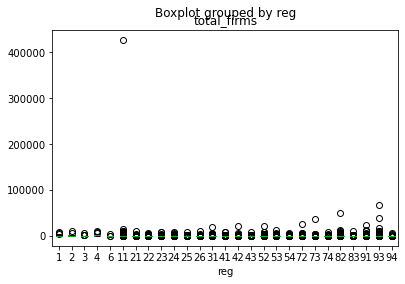

In [13]:
salary.boxplot(by='reg', column=['total_firms'], grid=False)

In [14]:
print(salary["codgeo"].nunique(),"codgeo" )
print(salary["name_town"].nunique(), "name_town")
print(salary["reg"].nunique(),"reg")
print(salary["dep"].nunique(),"dep")
print(salary["total_firms"].nunique(),"total_firms")
print(salary["null_size_firm"].nunique(),"null_size_firm")
print(salary["firm_6_9"].nunique(),"firm_6_9")
print(salary["firm_10_19"].nunique(),"firm_10_19")
print(salary["firm_20_49"].nunique(),"firm_20_49")
print(salary["firm_50_99"].nunique(),"firm_50_99")
print(salary["firm_100_199"].nunique(),"firm_100_199")
print(salary["firm_199_499"].nunique(),"firm_199_499")
print(salary["firm_500"].nunique(),"firm_500")


36681 codgeo
34142 name_town
27 reg
101 dep
1423 total_firms
1125 null_size_firm
272 firm_6_9
220 firm_10_19
160 firm_20_49
87 firm_50_99
57 firm_100_199
42 firm_199_499
23 firm_500


In [15]:
salary['%_non_info'] = salary['null_size_firm']/salary['total_firms']
salary.head()

,codgeo,name_town,reg,dep,total_firms,null_size_firm,firm_1_5,firm_6_9,firm_10_19,firm_20_49,firm_50_99,firm_100_199,firm_199_499,firm_500,%_non_info
0,01001,L'Abergement-Clémenciat,82,01,25,22,1,2,0,0,0,0,0,0,0.880000
1,01002,L'Abergement-de-Varey,82,01,10,9,1,0,0,0,0,0,0,0,0.900000
2,01004,Ambérieu-en-Bugey,82,01,996,577,272,63,46,24,9,3,2,0,0.579317
3,01005,Ambérieux-en-Dombes,82,01,99,73,20,3,1,2,0,0,0,0,0.737374
4,01006,Ambléon,82,01,4,4,0,0,0,0,0,0,0,0,1.000000


In [16]:
salary['small_co']= salary['firm_1_5']+salary['firm_6_9']+salary['firm_10_19']
salary['med_co']= salary['firm_20_49']+salary['firm_50_99']+salary['firm_100_199']
salary['big_co']= salary['firm_199_499']+salary['firm_500']


In [17]:
salary.head()

,codgeo,name_town,reg,dep,total_firms,null_size_firm,firm_1_5,firm_6_9,firm_10_19,firm_20_49,firm_50_99,firm_100_199,firm_199_499,firm_500,%_non_info,small_co,med_co,big_co
0,01001,L'Abergement-Clémenciat,82,01,25,22,1,2,0,0,0,0,0,0,0.880000,3,0,0
1,01002,L'Abergement-de-Varey,82,01,10,9,1,0,0,0,0,0,0,0,0.900000,1,0,0
2,01004,Ambérieu-en-Bugey,82,01,996,577,272,63,46,24,9,3,2,0,0.579317,381,36,2
3,01005,Ambérieux-en-Dombes,82,01,99,73,20,3,1,2,0,0,0,0,0.737374,24,2,0
4,01006,Ambléon,82,01,4,4,0,0,0,0,0,0,0,0,1.000000,0,0,0


In [18]:
#group by mean of total firms to know which cities have the greatest number of companies in the city
name_max = salary.groupby(['name_town']).agg({"total_firms" :"mean"})
name_max.sort_values(['total_firms'], ascending = False)[:10]

,total_firms
name_town,
Paris,427385.0
Marseille,68332.0
Lyon,49756.0
Nice,39314.0
Toulouse,36823.0
Bordeaux,26116.0
Montpellier,24508.0
Nantes,22585.0
Strasbourg,20882.0


We tried to find the cities with no companies but it's a large number (around 350), so it was more interesting to analyze the worst dep.

In [19]:
#Displaying the mean of companies by dep, grouping by reg (to know the reg). 10 top
best_Dep= salary.pivot_table(index=["reg","dep"], values=["total_firms"], aggfunc="mean")
best_Dep.sort_values(['total_firms'],ascending=False)[:10]

total_firms
reg dep               
11  75   427385.000000
    92     3653.555556
    93     2503.275000
4   974    2227.291667
11  94     1763.702128
1   971    1484.843750
93  13     1385.571429
2   972    1135.176471
93  06      761.950920
3   973     659.045455

In [20]:
#Displaying the mean of companies by dep, grouping by reg (to know the reg). 10 top
worst_dep= salary.pivot_table(index=["reg","dep"], values=["total_firms"], aggfunc="mean")
worst_dep.sort_values(['total_firms'],ascending=False)[-10:]

,,total_firms
reg,dep,
91,48,30.708108
73,32,30.611231
25,61,30.554455
21,08,30.352052
43,39,29.500000
22,02,28.447304
74,23,27.861538
43,70,21.777982
21,52,20.784897


In [21]:
#Looking for the cities where the companies have largest number of employees 
big_co_cit= salary.pivot_table(index=["name_town",'dep'], values=["big_co"], aggfunc="mean")
big_co_cit.sort_values(['big_co'],ascending=False)[:10]

,,big_co
name_town,dep,
Paris,75,636
Lyon,69,119
Marseille,13,102
Puteaux,92,94
Toulouse,31,93
Courbevoie,92,89
Boulogne-Billancourt,92,76
Saint-Denis,93,61
Levallois-Perret,92,57


In [22]:
#Looking for the cities where the companies have smallers number of employees 
small_co_cit= salary.pivot_table(index=["name_town",'dep'], values=["small_co"], aggfunc="mean")
small_co_cit.sort_values(['small_co'],ascending=False)[:10]

,,small_co
name_town,dep,
Paris,75,102033
Marseille,13,18299
Lyon,69,15148
Toulouse,31,11032
Nice,06,10357
Bordeaux,33,7625
Strasbourg,67,6645
Nantes,44,6454
Montpellier,34,6419


In [23]:
#Looking for the cities where the companies have smallers number of employees 
med_co_cit= salary.pivot_table(index=["name_town",'dep'], values=["med_co"], aggfunc="mean")
med_co_cit.sort_values(['med_co'],ascending=False)[:10]

,,med_co
name_town,dep,
Paris,75,8113
Lyon,69,1442
Marseille,13,1374
Toulouse,31,1114
Nantes,44,698
Bordeaux,33,639
Strasbourg,67,585
Nice,06,580
Aix-en-Provence,13,578


<AxesSubplot:xlabel='total_firms', ylabel='total_firms'>

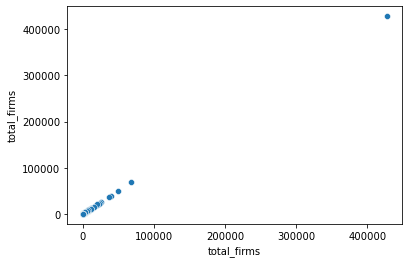

In [24]:
sns.scatterplot(data=salary, x='total_firms', y='total_firms')

In [25]:
top_city_employ = salary.iloc[salary['total_firms'].sort_values(ascending=False).head(10).index][['name_town', 'small_co' ,	'med_co', 'big_co']]
top_city_employ


,name_town,small_co,med_co,big_co
30784,Paris,102033,8113,636
4453,Marseille,18299,1374,102
28522,Lyon,15148,1442,119
2014,Nice,10357,580,32
12418,Toulouse,11032,1114,93
12981,Bordeaux,7625,639,52
13633,Montpellier,6419,553,41
17075,Nantes,6454,698,52
27951,Strasbourg,6645,585,48
23381,Lille,6022,569,48


In [26]:
top_city_employ2 = salary.iloc[salary['total_firms'].sort_values(ascending=False).head(10).index][['small_co' ,	'med_co', 'big_co']]
top_city_employ2

,small_co,med_co,big_co
30784,102033,8113,636
4453,18299,1374,102
28522,15148,1442,119
2014,10357,580,32
12418,11032,1114,93
12981,7625,639,52
13633,6419,553,41
17075,6454,698,52
27951,6645,585,48
23381,6022,569,48


Text(0.5, 0, '')

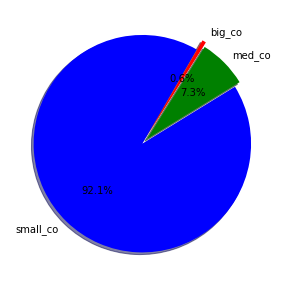

In [27]:
#Paris
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5,5)
explode = (0.01, 0.05, 0.09)
colors = ['blue', 'green', 'red']
top_city_employ2.iloc[0].plot(kind='pie', shadow=True, ax=ax, autopct='%1.1f%%',  explode=explode, startangle=60, colors=colors)
ax.set_ylabel('')
ax.set_xlabel('')



Text(0.5, 0, '')

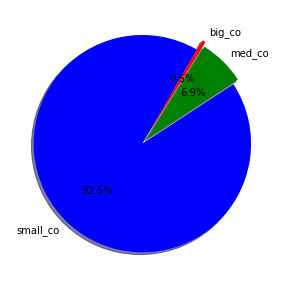

In [28]:
#Marseille
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5,5)
explode = (0.01, 0.05, 0.09)
colors = ['blue', 'green', 'red']
top_city_employ2.iloc[1].plot(kind='pie', shadow=True, ax=ax, autopct='%1.1f%%',  explode=explode, startangle=60, colors=colors)
ax.set_ylabel('')
ax.set_xlabel('')

Text(0.5, 0, '')

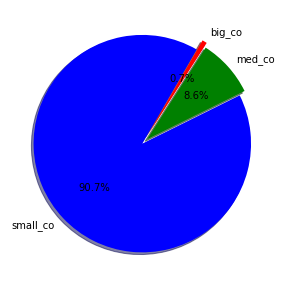

In [29]:
#Lyon
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5,5)
explode = (0.01, 0.05, 0.09)
colors = ['blue', 'green', 'red']
top_city_employ2.iloc[2].plot(kind='pie', shadow=True, ax=ax, autopct='%1.1f%%',  explode=explode, startangle=60, colors=colors)
ax.set_ylabel('')
ax.set_xlabel('')

Text(0.5, 0, '')

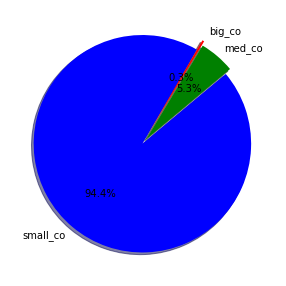

In [30]:
#Nice
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5,5)
explode = (0.01, 0.05, 0.09)
colors = ['blue', 'green', 'red']
top_city_employ2.iloc[3].plot(kind='pie', shadow=True, ax=ax, autopct='%1.1f%%',  explode=explode, startangle=60, colors=colors)
ax.set_ylabel('')
ax.set_xlabel('')

Text(0.5, 0, '')

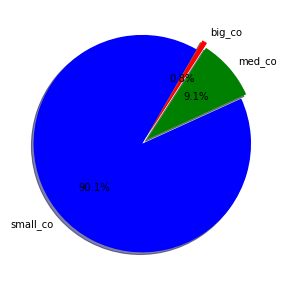

In [31]:
#Toulouse
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5,5)
explode = (0.01, 0.05, 0.09)
colors = ['blue', 'green', 'red']
top_city_employ2.iloc[4].plot(kind='pie', shadow=True, ax=ax, autopct='%1.1f%%',  explode=explode, startangle=60, colors=colors)
ax.set_ylabel('')
ax.set_xlabel('')

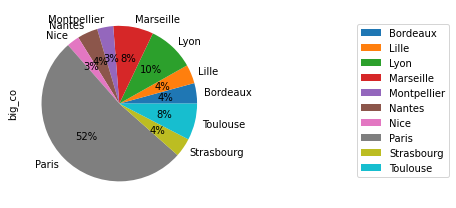

In [32]:
top_city_employ.groupby(['name_town']).sum().plot(kind='pie', y='big_co' , autopct='%1.0f%%')


plt.legend(bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)


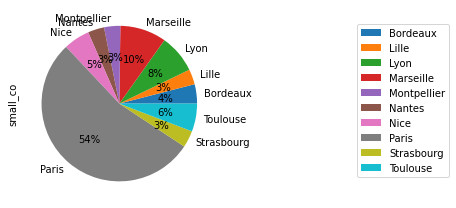

In [33]:
top_city_employ.groupby(['name_town']).sum().plot(kind='pie', y='small_co' , autopct='%1.0f%%')


plt.legend(bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)

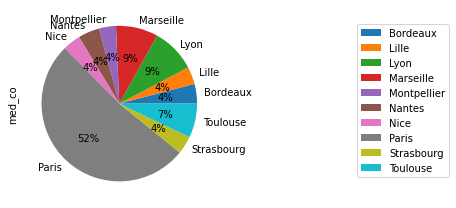

In [34]:
top_city_employ.groupby(['name_town']).sum().plot(kind='pie', y='med_co' , autopct='%1.0f%%')


plt.legend(bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)

In [35]:
salary

,codgeo,name_town,reg,dep,total_firms,null_size_firm,firm_1_5,firm_6_9,firm_10_19,firm_20_49,firm_50_99,firm_100_199,firm_199_499,firm_500,%_non_info,small_co,med_co,big_co
0,01001,L'Abergement-Clémenciat,82,01,25,22,1,2,0,0,0,0,0,0,0.880000,3,0,0
1,01002,L'Abergement-de-Varey,82,01,10,9,1,0,0,0,0,0,0,0,0.900000,1,0,0
2,01004,Ambérieu-en-Bugey,82,01,996,577,272,63,46,24,9,3,2,0,0.579317,381,36,2
3,01005,Ambérieux-en-Dombes,82,01,99,73,20,3,1,2,0,0,0,0,0.737374,24,2,0
4,01006,Ambléon,82,01,4,4,0,0,0,0,0,0,0,0,1.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36676,97613,M'Tsangamouji,6,976,169,169,0,0,0,0,0,0,0,0,1.000000,0,0,0
36677,97614,Ouangani,6,976,230,230,0,0,0,0,0,0,0,0,1.000000,0,0,0
36678,97615,Pamandzi,6,976,569,569,0,0,0,0,0,0,0,0,1.000000,0,0,0
36679,97616,Sada,6,976,345,345,0,0,0,0,0,0,0,0,1.000000,0,0,0


In [36]:
name_max = salary.groupby(['name_town']).agg({"total_firms" :"mean"})
name_max.sort_values(['total_firms'], ascending = False)[:10]

top_max_df = salary.iloc[salary['total_firms'].sort_values(ascending=False).head(10).index][['name_town', 'total_firms']]
top_max_df



,name_town,total_firms
30784,Paris,427385
4453,Marseille,68332
28522,Lyon,49756
2014,Nice,39314
12418,Toulouse,36823
12981,Bordeaux,26116
13633,Montpellier,24508
17075,Nantes,22585
27951,Strasbourg,20882
23381,Lille,19787


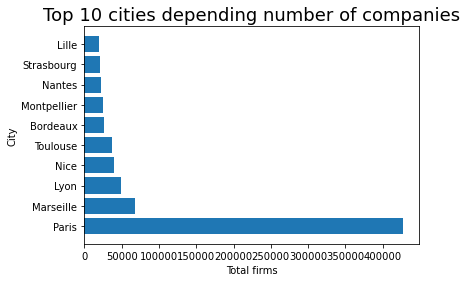

In [37]:
plt.barh(y=top_max_df['name_town'], width=top_max_df['total_firms'])
plt.title('Top 10 cities depending number of companies', fontsize=18)
plt.xlabel('Total firms')
plt.ylabel('City')
plt.show()

# fig, ax = plt.subplots()
# name_max.plot.bar(x='name_town', ax=ax)

In [38]:
top_max_dep_df = salary.iloc[salary['total_firms'].sort_values(ascending=False).head(20).index][['dep', 'total_firms']]
top_max_dep_df


,dep,total_firms
30784,75,427385
4453,13,68332
28522,69,49756
2014,06,39314
12418,31,36823
12981,33,26116
13633,34,24508
17075,44,22585
27951,67,20882
23381,59,19787


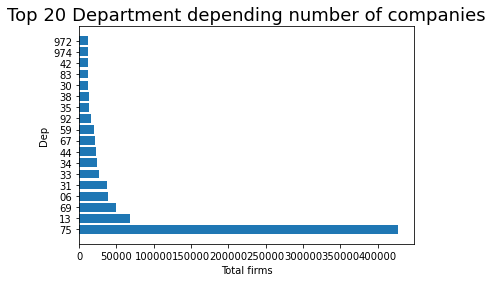

In [39]:
plt.barh(y=top_max_dep_df['dep'], width=top_max_dep_df['total_firms'])
plt.title('Top 20 Department depending number of companies', fontsize=18)
plt.xlabel('Total firms')
plt.ylabel('Dep')
plt.show()

In [40]:
salary

,codgeo,name_town,reg,dep,total_firms,null_size_firm,firm_1_5,firm_6_9,firm_10_19,firm_20_49,firm_50_99,firm_100_199,firm_199_499,firm_500,%_non_info,small_co,med_co,big_co
0,01001,L'Abergement-Clémenciat,82,01,25,22,1,2,0,0,0,0,0,0,0.880000,3,0,0
1,01002,L'Abergement-de-Varey,82,01,10,9,1,0,0,0,0,0,0,0,0.900000,1,0,0
2,01004,Ambérieu-en-Bugey,82,01,996,577,272,63,46,24,9,3,2,0,0.579317,381,36,2
3,01005,Ambérieux-en-Dombes,82,01,99,73,20,3,1,2,0,0,0,0,0.737374,24,2,0
4,01006,Ambléon,82,01,4,4,0,0,0,0,0,0,0,0,1.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36676,97613,M'Tsangamouji,6,976,169,169,0,0,0,0,0,0,0,0,1.000000,0,0,0
36677,97614,Ouangani,6,976,230,230,0,0,0,0,0,0,0,0,1.000000,0,0,0
36678,97615,Pamandzi,6,976,569,569,0,0,0,0,0,0,0,0,1.000000,0,0,0
36679,97616,Sada,6,976,345,345,0,0,0,0,0,0,0,0,1.000000,0,0,0


In [66]:
best_Dep2= salary.pivot_table(index=["dep"], values=["total_firms"], aggfunc="mean")
best_dep_df=best_Dep2.sort_values(['total_firms'],ascending=False)[:20]
best_dep_df.reset_index(inplace=True)

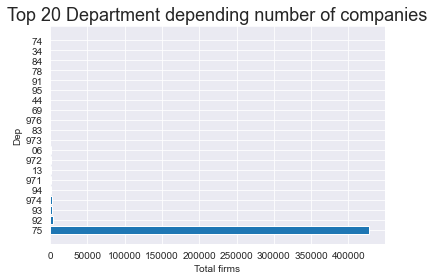

In [76]:
plt.barh(y=best_dep_df['dep'], width=best_dep_df['total_firms'])
plt.title('Top 20 Department depending number of companies', fontsize=18)
plt.xlabel('Total firms')
plt.ylabel('Dep')
plt.show()

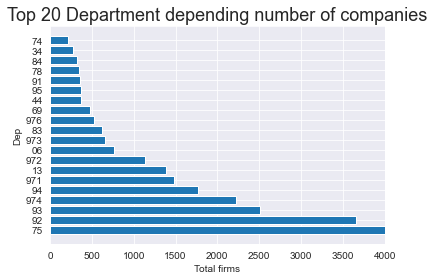

In [75]:
plt.barh(y=best_dep_df['dep'], width=best_dep_df['total_firms'])
plt.title('Top 20 Department depending number of companies', fontsize=18)
plt.xlim(0,4000)
plt.xlabel('Total firms')
plt.ylabel('Dep')
plt.show()


In [48]:
top_max_dep_df2 = salary.iloc[salary['total_firms'].sort_values(ascending=False).head(20).index][['dep', 'total_firms']]
top_max_dep_df2

,dep,total_firms
30784,75,427385
4453,13,68332
28522,69,49756
2014,06,39314
12418,31,36823
12981,33,26116
13633,34,24508
17075,44,22585
27951,67,20882
23381,59,19787


In [42]:

top_max_20_df = salary.iloc[salary['total_firms'].sort_values(ascending=False).head(20).index][['name_town', 'total_firms', 'big_co', 'small_co', 'med_co']]
top_max_20_df

,name_town,total_firms,big_co,small_co,med_co
30784,Paris,427385,636,102033,8113
4453,Marseille,68332,102,18299,1374
28522,Lyon,49756,119,15148,1442
2014,Nice,39314,32,10357,580
12418,Toulouse,36823,93,11032,1114
12981,Bordeaux,26116,52,7625,639
13633,Montpellier,24508,41,6419,553
17075,Nantes,22585,52,6454,698
27951,Strasbourg,20882,48,6645,585
23381,Lille,19787,48,6022,569


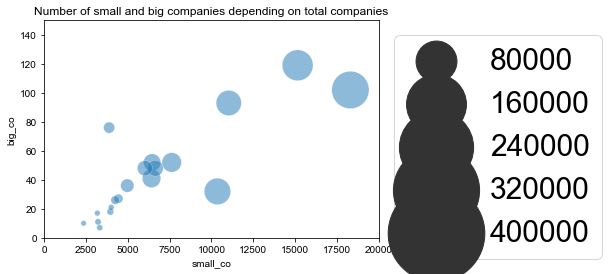

In [43]:

from gapminder import gapminder # import data set 

# data 
data = top_max_20_df

sns.scatterplot(data=data, x="small_co", y="big_co", size="total_firms", alpha=0.5, sizes=(30, 10000))
plt.xlim(0,20000)
plt.ylim(0,150)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=30)
sns.set_style("darkgrid")
plt.title('Number of small and big companies depending on total companies',)

plt.show()

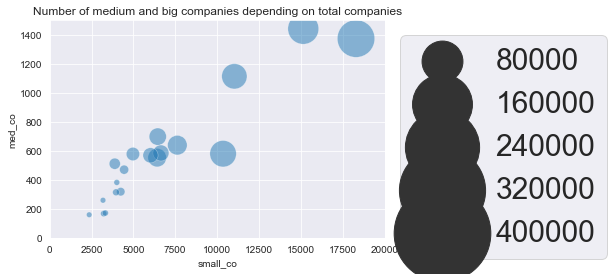

In [44]:
# data 
data = top_max_20_df

sns.scatterplot(data=data, x="small_co", y="med_co", size="total_firms", alpha=0.5, sizes=(30, 10000))
plt.xlim(0,20000)
plt.ylim(0,1500)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=30)
sns.set_style("darkgrid")
plt.title('Number of medium and big companies depending on total companies',)

plt.show()